<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/atividade5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# comando da questão

Considere o cenário hipotético no qual as features e os parâmetros da rede neural não são apresentados, mas apenas a sua saída na forma de raw logits para um 3-class classification problem, como no exemplo abaixo:

[[2.5, 0.3, 2.1],  
 [1.2, 2.4, 0.1],  
 [0.8, 0.5, 3.0]]

São usadas apenas três amostradas para treinar a rede. A primeira amostra da Classe 1 (1 0 0), a segunda da Classe 2 (0 1 0) e a terceira da Classe 3 (0 0 1)

No seu programa será simulada iterativamente apenas a saída da rede na forma raw logits, sem considerar os seus parâmetros e as features. A primeira saída será aleatória no formato mostrado abaixo, com valores entre 0.1 a 3.0:

A partir desta saída, aplique a função softmax para gerar probabilidades

Nota: veja que cada linha na matriz se refere a uma das três amostras, e cada coluna a uma das classes

A partir das probabilidades geradas, calcule a cross-entropy loss

A partir das probabilidades geradas, calcule a cross-entropy loss

Usando uma distribuição Gaussiana cuja a média é cada um dos raw logits originais e com o desvio padrão sendo um hiperparâmetro, gere outras quatro sequências.

Em cada uma delas aplique novamente a softmax e calcule a cross-entropy loss.  Ordene as sequências, incluindo a original, de acordo com a entropia média, e descarte as quatro piores. Repita o processo 30 vezes. Mostre a evolução da entropia com o número de iterações.




# Simulador de Rede Neural para Classificação

O programa simula o comportamento de uma rede neural para um problema de classificação
com 3 classes, focando na otimização dos logits de saída através de um processo evolutivo.

Conceitos Importantes:
1. Logits: São as saídas brutas da rede neural antes da normalização
2. Softmax: Função que converte logits em probabilidades
3. Cross-Entropy: Medida de diferença entre as distribuições prevista e real
4. One-Hot Encoding: Representação binária das classes


In [121]:
# importações nescessárias
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [122]:
# semente aleatória baseada no timestamp atual
# datetime.now(): data e hora atuais
# timestamp: coverte para segundos
np.random.seed(int(datetime.now().timestamp()))

In [123]:
# labels verdadeiras em formato one-hot encoding
# ex: [1, 0, 0] classe 1
#.    [0, 1, 0] classe 2
#.    [0, 0, 1] classe 3
# one-hot encoding: a posição tem valor 1 (sendo a calsse)
# todas as outras tem posição 0
y_true = np.array([
    [1, 0, 0], # amostra 1 - classe 1
    [0, 1, 0], # amostra 2 - classe 2
    [0, 0, 1] # amostra 3 - classe 3
])

In [124]:
# armazrnar historico de avolução
entropia_historico = [] # valores de loss
logits_historico = [] # valores de logits
probabilidades_historico = [] # valores de probabilidades


Inicializa o simulador com as configurações básicas

# O que são logits?

Logits são os valores brutos produzidos por uma camada de saída de um modelo de aprendizado de máquina antes de serem transformados em probabilidades. são usados em problemas de classificação e servem como entradas para funções de ativação, como softmax que converte esses valores em probabilidades normalizadas.

In [125]:
def visualizar_matriz(matriz, titulo, e_probabilidade=False):
  """
  vizualização da matriz de probabilidades

  matriz: np.array - matriz a ser visualizada
  titulo: str - titulo do grafico
  e_probabilidade: bool - indica se a matriz tem probabilidades
  """

  plt.figure(figsize=(10, 8))
  sns.heatmap(
      matriz,
      annot=True, # mostra os valores de cada celula
      fmt='.3f', # formato de numeros
      cmap='YlOrRd', #esquemas de cores
      cbar_kws={'label': 'valor'})

  plt.title(titulo, pad=20, size=12)
  if e_probabilidade:
    plt.xlabel('Classes (0, 1, 2)')
    plt.ylabel('Amostras')

  # explica o que está sendo mostrado
  if e_probabilidade:
    plt.figtext(0.02, -0.1,
      "Cada linha representa uma amostra,\n" +
      "cada coluna representa a probabilidade para cada classe.",
      wrap=True)
  plt.show()


# O que é Softmax?
é uma função usada para converter logits (saídas não normalizadas) em probabilidades. Ele faz isso transformando cada logit em um valor positivo e garantindo que a soma de todas as saídas seja igual a 1.

A fórmula do Softmax é:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$

Onde:

- $(z_i)$: logit para a $(i)$-ésima classe.
- $(e^{z_i})$: exponencial do logit $(z_i)$.
- $(\sum_{j=1}^n e^{z_j})$: soma das exponenciais de todos os logits (normalização).
- O resultado será uma distribuição de probabilidades, onde a soma de todas as probabilidades será igual a 1.


In [126]:
def calcular_softmax(logits):
  """
  Aplica a função softmax pra converter logits em probabilidades

  logtis: np.array - array de logitis a serem convertidos
  retorno: np.array - probabilidades (soma 1)
  """
  # axis=1: A operação é realizada ao longo das colunas, ou seja, para cada linha.
  return softmax(logits, axis=1)


# O que é Cross-Entropy Loss?

A Cross-Entropy Loss é uma função de perda. Ela mede a diferença entre a distribuição de probabilidade verdadeira (rótulos reais) e as probabilidades previstas pelo modelo. o  objetivo da loss é penalizar previsões incorretas, atribuindo uma perda maior às previsões que estão mais distantes dos valores reais. Isso ajuda o modelo a ajustar seus pesos para melhorar a precisão das previsões.


A fórmula da Cross-Entropy Loss é:

$$
L = - \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y_{ij} \cdot \log(\hat{y}_{ij})
$$

Onde:

- $(N)$: número de amostras (dados de entrada).
- $(C)$: número de classes.
- $(y_{ij})$: valor verdadeiro (ground truth) para a $(i)$-ésima amostra e $(j)$-ésima classe (normalmente representado como one-hot encoding).
- $(hat{y}_{ij})$: probabilidade prevista pelo modelo para a $(i)$-ésima amostra e $(j)$-ésima classe (após aplicar softmax).
- $(log)$: logaritmo natural.





In [127]:
def calcular_cross_entropy(y_true, y_pred):
  """
  Calcula a loss entre as labels verdadeiras e as probabilidades previstas

  y_true: np.array - labels verdadeiras (one-hot encoded)
  y_pred: np.array - probabilidades previstas
  retorno: float - loss calculada
  """

  epsilon = 1e-15 #evita log(0) com valor muito pequeno
  # np.clip limita os valores de y_pred entre um intervalo definido
  # valor minimo: epsilon (1e-15)
  # valor maximo: 1 - epsilon (1 - 1e-15)
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # evita log(0)
  # np.log(y_pred): Aplica o logaritmo natural (base e)
  # a cada valor da matriz y_pred
  # y_true * np.log(y_pred): Multiplica os valores de y_true (que são one-hot encoded)
  # pelas probabilidades logaritmadas de y_pred
  # np.sum(...): Soma todos os valores resultantes da multiplicação y_true * np.log(y_pred)
  # para todas as amostras
  # / y_true.shape[0]: Divide pela quantidade total de amostras (ou seja, o número de linhas de y_true).
  # -: estamos negando o valor
  return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

Gera logits iniciais aleatórios

In [128]:
def gerar_logits_iniciais():
  """
  retorno: np.array - matriz 3x3 com valores entre 0.1 e 3.0
  """
  return np.random.uniform(0.1, 3.0, (3, 3))

Gera variações dos logits usano distribuição Gaussiana (ou distribuição normal)

In [129]:
def gerar_variacoes(logits, std_dev=0.2):
  """
  logits: np.array - base pra gerar as variacoes
  std_dev: float - desvio padrao da distribuicao gaussiana
  retorno: list - Lista com 4 variações dos logits originais
  """

  # np.random.normal: gera numeros aleatórios em uma disreibuição normal
  # logits.shape: ruido gerado com a mesma forma e dimensões de logits
  return [logits + np.random.normal(0, std_dev, logits.shape)
          for _ in range(8)]

# Executa a simulação completa do processo:

1. Gerar logits iniciais
2. em cada iteração:
  * Gerar váriações dos logits atuais
  * calcular a loss pra cda variação
  * selecionar a melhor variação
3. Registrar os resultados

In [130]:
def executar_simulacao(num_iteracoes=30):
    """
    Executa a simulação do processo evolutivo.

    num_iteracoes: int - número de iterações do processo evolutivo
    """
    logits_atuais = gerar_logits_iniciais()

    # Estado inicial
    print('Estado Inicial do Sistema:')
    visualizar_matriz(logits_atuais, 'Logits Iniciais')

    probabilidades_iniciais = calcular_softmax(logits_atuais)
    loss_inicial = calcular_cross_entropy(y_true, probabilidades_iniciais)
    print(f'\nLoss inicial: {loss_inicial:.4f}')

    # Processo evolutivo
    print('Iniciando Processo Evolutivo:')

    for iteracao in range(num_iteracoes):
        # Gerar e avaliar variações
        todas_sequencias = [logits_atuais] + gerar_variacoes(logits_atuais)

        entropias = []
        for sequencia in todas_sequencias:
            probabilidades = calcular_softmax(sequencia)
            loss = calcular_cross_entropy(y_true, probabilidades)
            entropias.append((loss, sequencia))

        # Selecionar melhor resultado
        entropias.sort(key=lambda x: x[0])
        logits_atuais = entropias[0][1]

        # Registrar histórico
        entropia_historico.append(entropias[0][0])
        logits_historico.append(logits_atuais)
        probabilidades_historico.append(calcular_softmax(logits_atuais))

        # Mostrar progresso
        if (iteracao + 1) % 10 == 0:
            melhoria = (loss_inicial - entropias[0][0]) / loss_inicial * 100
            print(f"Iteração {iteracao + 1:3d}: "
                  f"Loss = {entropias[0][0]:.4f} "
                  f"(Melhoria: {melhoria:6.2f}%)")

    # Resultados finais
    print('\n' + '='*40)
    print('Resultados Finais:')
    print('='*40)
    visualizar_matriz(logits_atuais, 'Logits Finais')

    melhoria_total = (loss_inicial - entropia_historico[-1]) / loss_inicial * 100
    print(f"\nLoss Final: {entropia_historico[-1]:.4f}")
    print(f"Melhoria Total: {melhoria_total:.2f}%")

In [131]:
def plotar_evolucao_combinada():
    """
    Plota gráfico combinado mostrando evolução da loss e das probabilidades.
    Mantém a estrutura original mas adiciona mais informações visuais.
    """
    # Usar estilo padrão mais limpo do matplotlib
    plt.style.use('default')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.patch.set_facecolor('white')  # Fundo branco

    # Gráfico da Loss
    ax1.plot(entropia_historico, color='#2980b9', linewidth=2)
    ax1.set_xlabel('Iterações', fontsize=10)
    ax1.set_ylabel('Loss', fontsize=10)
    ax1.set_title('Evolução da Loss', fontsize=12, pad=10)
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Adicionar informação sobre melhoria
    melhoria = (entropia_historico[0] - entropia_historico[-1]) / entropia_historico[0] * 100
    ax1.text(0.05, 0.95, f'Melhoria total: {melhoria:.1f}%',
             transform=ax1.transAxes,
             bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

    # Gráfico das Probabilidades
    cores = ['#2ecc71', '#e74c3c', '#3498db']  # Verde, Vermelho, Azul
    probabilidades_historico_array = np.array(probabilidades_historico)

    for amostra in range(3):
        for classe in range(3):
            if amostra == classe:  # Apenas probabilidades da classe correta
                ax2.plot(probabilidades_historico_array[:, amostra, classe],
                        color=cores[amostra],
                        linewidth=2,
                        label=f'Amostra {amostra+1}, Classe {classe+1}')

    ax2.set_xlabel('Iterações', fontsize=10)
    ax2.set_ylabel('Probabilidade', fontsize=10)
    ax2.set_title('Evolução das Probabilidades\n(Classes Corretas)', fontsize=12, pad=10)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(fontsize=9)

    # Ajustar limites do eixo y para probabilidades
    ax2.set_ylim(0, 1.1)

    plt.tight_layout()

    # Texto explicativo mais informativo
    plt.figtext(0.02, -0.1,
                "Esquerda: Mostra a diminuição da loss (erro) ao longo das iterações.\n"
                "Direita: Mostra como as probabilidades das classes corretas aumentam, "
                "indicando melhor classificação.",
                wrap=True, fontsize=10)

    plt.show()


    Simulador de Rede Neural
    
    Este programa simula o processo de otimização dos logits de saída
    de uma rede neural para um problema de classificação com 3 classes.
    
    O processo utiliza uma abordagem evolutiva para minimizar a loss
    e maximizar as probabilidades das classes corretas.
    
Estado Inicial do Sistema:


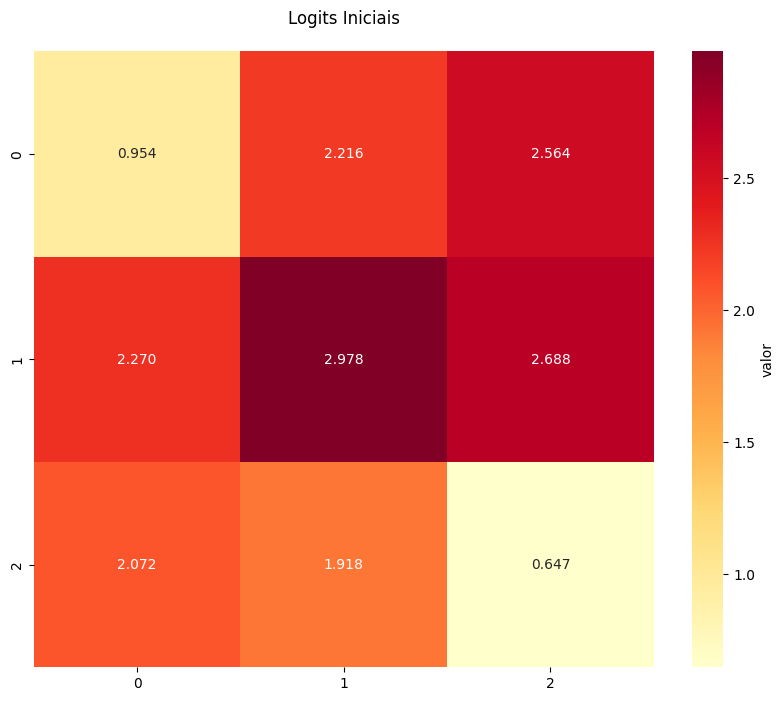


Loss inicial: 1.7426
Iniciando Processo Evolutivo:
Iteração  10: Loss = 0.4505 (Melhoria:  74.15%)
Iteração  20: Loss = 0.0651 (Melhoria:  96.26%)
Iteração  30: Loss = 0.0069 (Melhoria:  99.60%)

Resultados Finais:


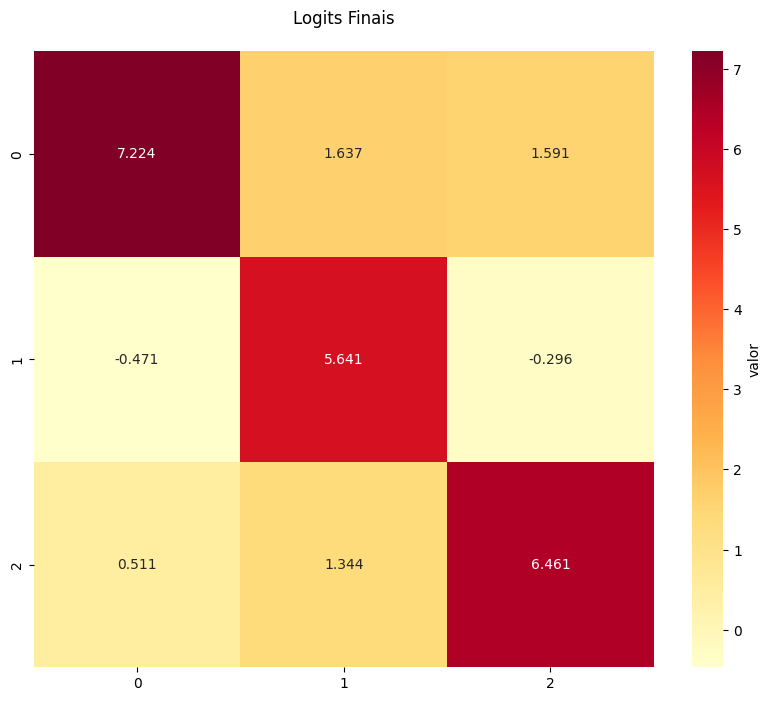


Loss Final: 0.0069
Melhoria Total: 99.60%

Análise dos Resultados:


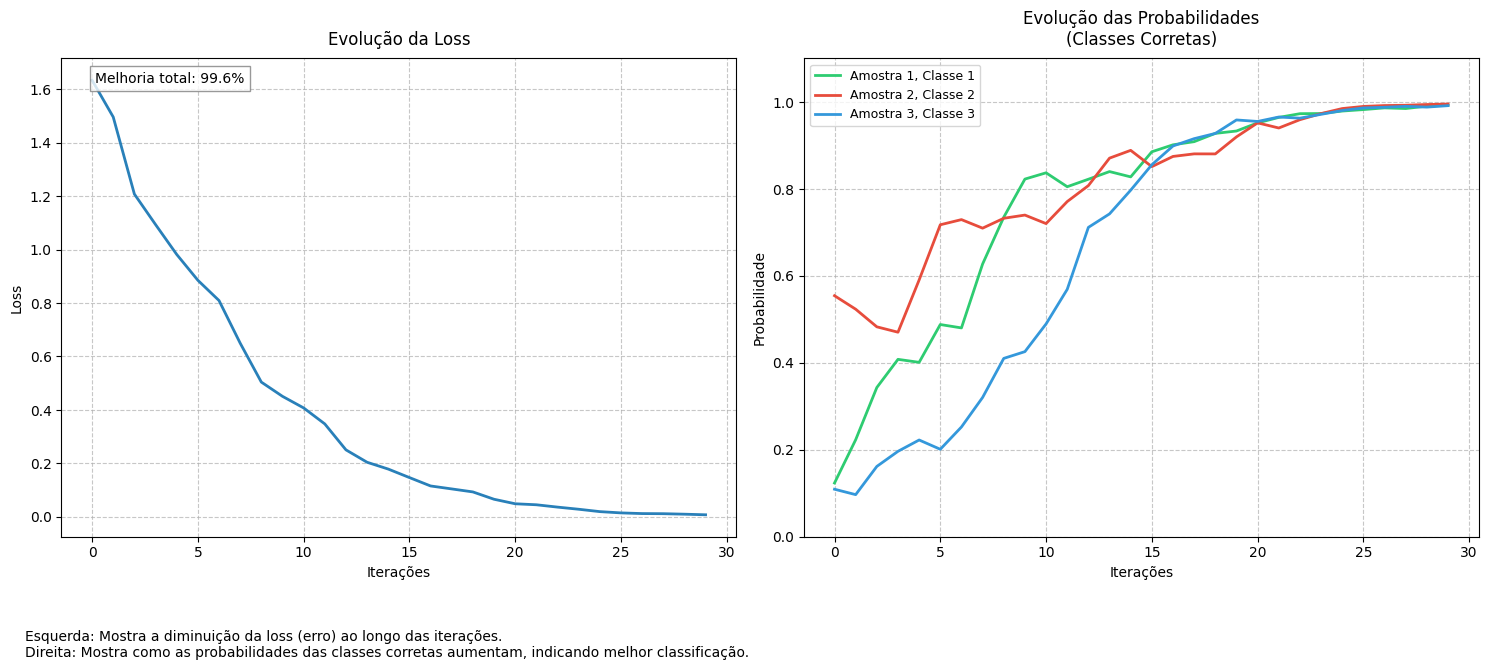

In [132]:
if __name__ == '__main__':
    print("""
    Simulador de Rede Neural

    Este programa simula o processo de otimização dos logits de saída
    de uma rede neural para um problema de classificação com 3 classes.

    O processo utiliza uma abordagem evolutiva para minimizar a loss
    e maximizar as probabilidades das classes corretas.
    """)

    # Executar simulação
    executar_simulacao()

    # Mostrar resultados
    print('\nAnálise dos Resultados:')
    plotar_evolucao_combinada()